In [1]:
from scipy.signal import iirnotch, lfilter, freqz
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Parameter
fs = 48000  # Sampling-Frequenz
notch_freqs = [70, 140, 210, 280, 350, 420, 490]  # Notch-Frequenz
Q = 30  # Q-Faktor für schmale Bandbreite
order = 2  # gewünschte Filterordnung

coeffs = []

In [40]:
for freq in notch_freqs:
    # Initialisiere die Filter-Koeffizienten
    b, a = 1, 1  # Dummy-Werte für die Kombination

    # Erstelle mehrere Notches für höhere Ordnung
    for _ in range(order // 2):
        b_notch, a_notch = iirnotch(freq / (fs / 2), Q)
        b = np.convolve(b, b_notch)
        a = np.convolve(a, a_notch)

    coeffs.append((b,a))

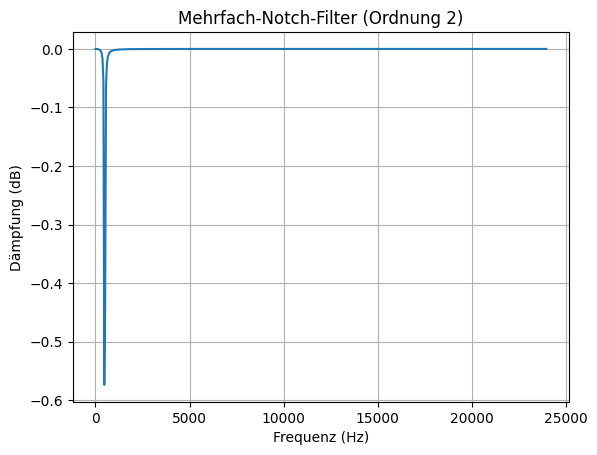

In [41]:
# Frequenzgang des Filters berechnen
w, h = freqz(b, a, fs=fs)

# Frequenzgang plotten
plt.plot(w, 20 * np.log10(abs(h)))
plt.title(f"Mehrfach-Notch-Filter (Ordnung {order})")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Dämpfung (dB)")
plt.grid()
plt.show()

In [43]:
# Export der Filterkoeffizienten in eine Textdatei
with open("iir_coefficients.txt", "w") as file:
    for coeff in coeffs:
        file.write(f"b-Koeff: {coeff[0]} a-Koeff: {coeff[1]}\n\n")

print("FIR-Filterkoeffizienten wurden berechnet und in 'fir_coefficients.txt' gespeichert.")

FIR-Filterkoeffizienten wurden berechnet und in 'fir_coefficients.txt' gespeichert.
